In [204]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  #helps to normalizes data between zero an one

# Classifiers libraries i.e machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

import xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
df = pd.read_csv(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\CAPSTONE PROJECT\bank.csv")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [208]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Data Cleaning

#### Removing outliers in campaign

In [209]:
# using the percentile limit of 0.20 and 0.80
Q1=df.duration.quantile(0.20)
Q3 = df.duration.quantile(0.80)
Q1, Q3

(89.0, 368.0)

In [210]:
IQR =Q3-Q1
IQR

279.0

In [211]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit, upper_limit

(-329.5, 786.5)

In [212]:
# the outliers

df[(df.duration<lower_limit) | (df.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
61,53,technician,divorced,secondary,no,989,yes,no,unknown,5,may,812,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45072,54,management,divorced,tertiary,no,5475,no,no,cellular,21,oct,1032,1,91,4,success,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [213]:
#remove outliers
df_no_outlier = df[(df.duration>lower_limit) & (df.duration<upper_limit)]
df_no_outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [214]:
# removing the outlier in 'prvious' which has an extreme value of 275
df_no_outlier=df_no_outlier[df_no_outlier['previous'] < 250]
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [215]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43187 non-null  int64 
 1   job        43187 non-null  object
 2   marital    43187 non-null  object
 3   education  43187 non-null  object
 4   default    43187 non-null  object
 5   balance    43187 non-null  int64 
 6   housing    43187 non-null  object
 7   loan       43187 non-null  object
 8   contact    43187 non-null  object
 9   day        43187 non-null  int64 
 10  month      43187 non-null  object
 11  duration   43187 non-null  int64 
 12  campaign   43187 non-null  int64 
 13  pdays      43187 non-null  int64 
 14  previous   43187 non-null  int64 
 15  poutcome   43187 non-null  object
 16  deposit    43187 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Exploratory Analysis

#### Age Analysis

In [216]:
# checking the ages covered
print('Max. Age: ',df_no_outlier['age'].max())
print('Min. Age: ',df_no_outlier['age'].min()) 

Max. Age:  95
Min. Age:  18


In [217]:
# categorizing age

def age_bracket(age):
    if age <= 30:
        return 'Youth (<=30)'
    elif age <= 45:
        return 'Adults (<=45)'
    elif age <= 70:
        return 'Old Adults (<=70)'
    else:
        return 'Aged (>=71)'
    
df_no_outlier['age_bracket'] = df_no_outlier['age'].apply(age_bracket)

df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old Adults (<=70)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adults (<=45)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adults (<=45)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Old Adults (<=70)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adults (<=45)


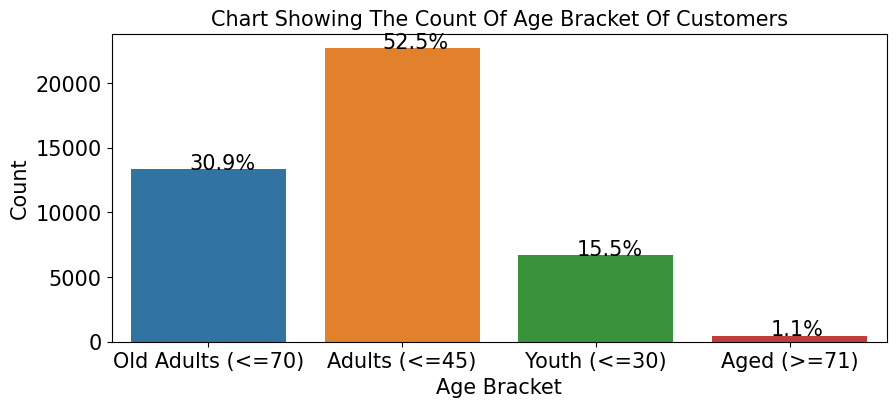

In [218]:
# analyzing the age bracket

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['age_bracket'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Age Bracket', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Count Of Age Bracket Of Customers', size=15)
# Calculate percentages
total = float(len(df_no_outlier['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation

- The chart above shows that the bank has its customer base saturated more with the 'Adult' age range and 'Old Adult' age range, with 52.5% and 30.9% respectively while the 'Aged' are the least represented, with 1.1% of the customer base.

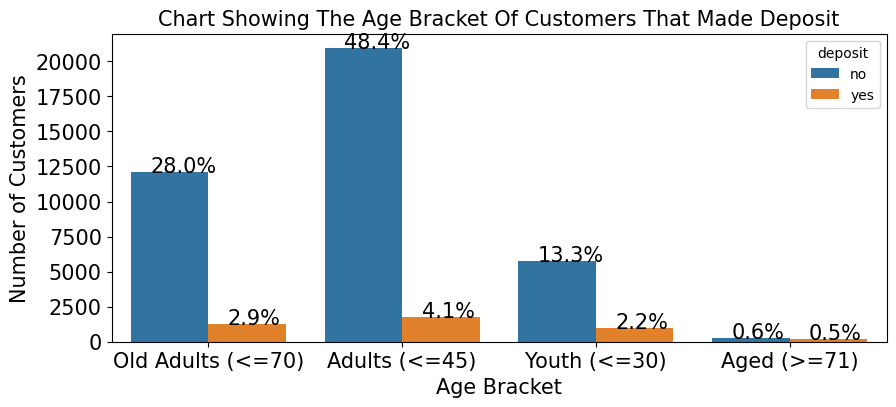

In [219]:
# analyzing the age range that made deposit


plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['age_bracket'], hue='deposit', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Age Bracket', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Showing The Age Bracket Of Customers That Made Deposit', size=15)
# Calculate percentages
total = float(len(df_no_outlier['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observations
- The 'Adults' and 'Old Adults' group take the largest precentage of the bank's customers that did not make deposit.

### Exploring the Contact feature

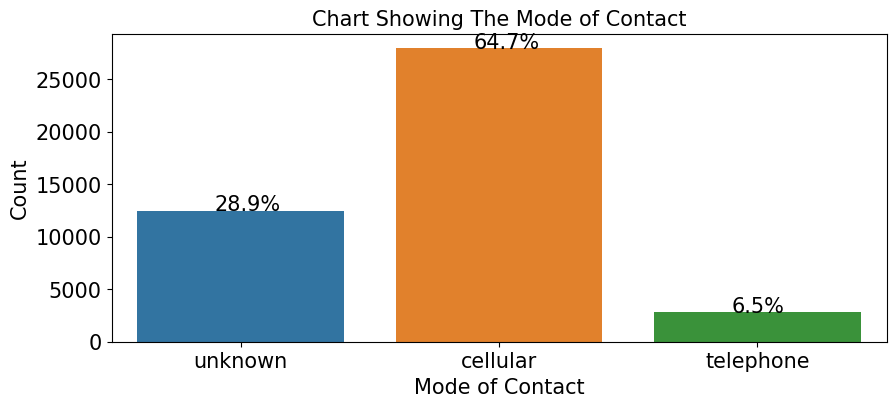

In [220]:
# analyzing the contact feature

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Mode of Contact', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

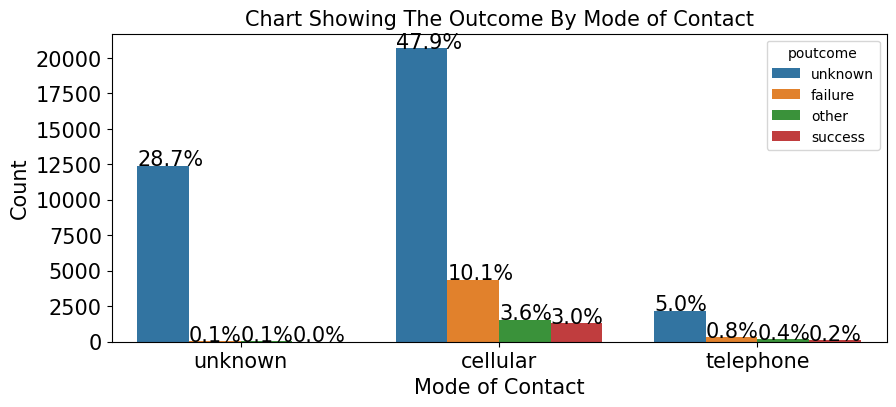

In [221]:
# analyzing the contact feature

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='poutcome', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Outcome By Mode of Contact', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation

- Customers that were contacted via cellular resulted to a higher percentage of success compared to the other modes

Text(0.5, 1.0, 'Contact Type By Campaign')

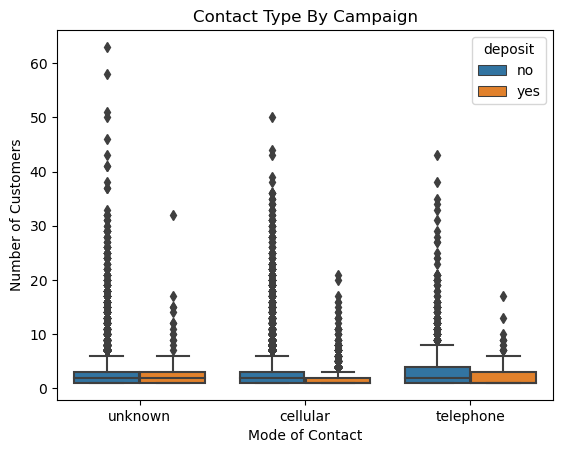

In [222]:
sns.boxplot(x='contact', y='campaign',hue='deposit', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Number of Customers')
plt.title('Contact Type By Campaign')

#### Observations
- The above chart shows that there is no clear distinction in the spread of customers contacted on different platform to determine its influence on deposit.

Text(0.5, 1.0, 'Contact Type By Previous Campaign')

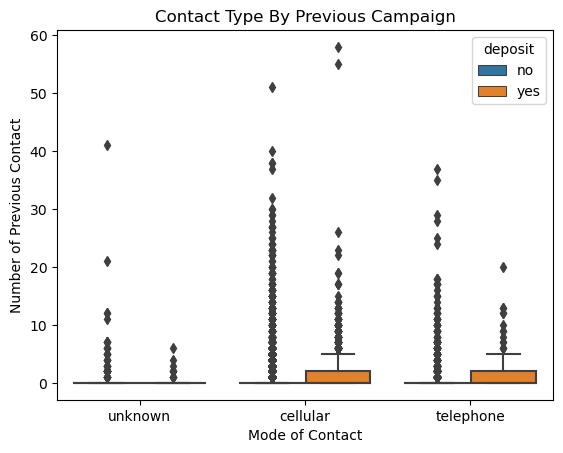

In [223]:
sns.boxplot(x='contact', y='previous',hue='deposit', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Number of Previous Contact')
plt.title('Contact Type By Previous Campaign')

#### Observations

- The above chart shows that customers reached out to through cellular and telephone in the previous campaign have a higher probability of customers to make deposits.

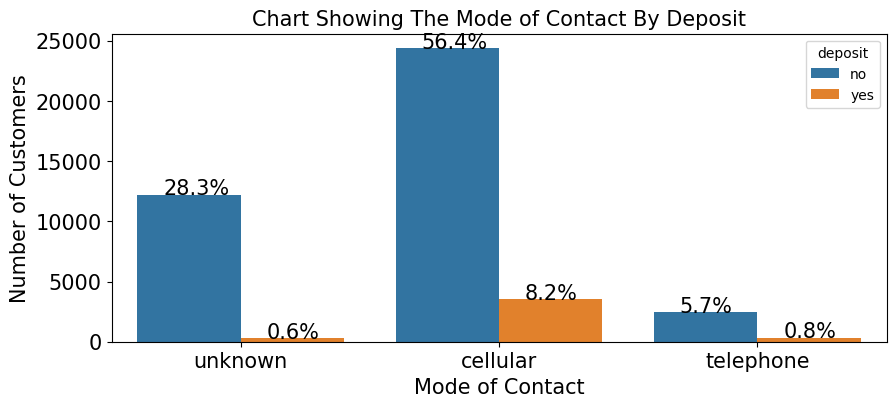

In [224]:
# analyzing the contact feature by deposit

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='deposit', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Showing The Mode of Contact By Deposit', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observations
- Customers contacted via cellular had a higher percentage of customers that deposited

Text(0.5, 1.0, 'Contact Type By Duration')

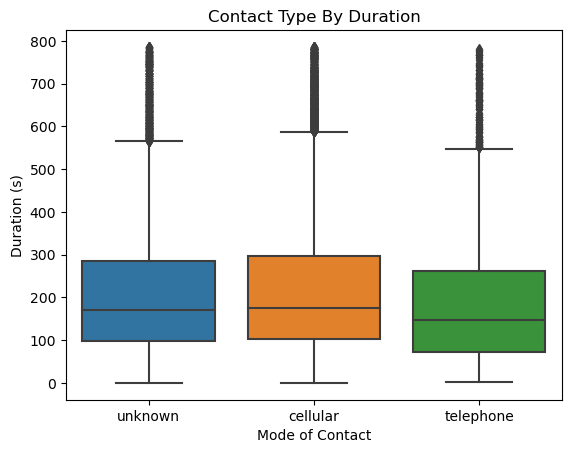

In [225]:
sns.boxplot(x='contact', y='duration', data=df_no_outlier)
plt.xlabel('Mode of Contact')
plt.ylabel('Duration (s)')
plt.title('Contact Type By Duration')

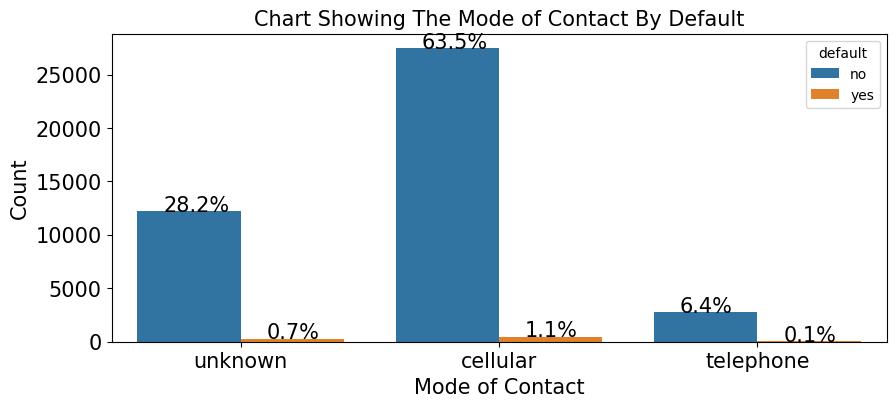

In [226]:
# analyzing the contact feature by deposit

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['contact'],hue='default', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Mode of Contact', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Mode of Contact By Default', size=15)
# Calculate percentages
total = float(len(df_no_outlier['contact']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Analyzing The Job Feature

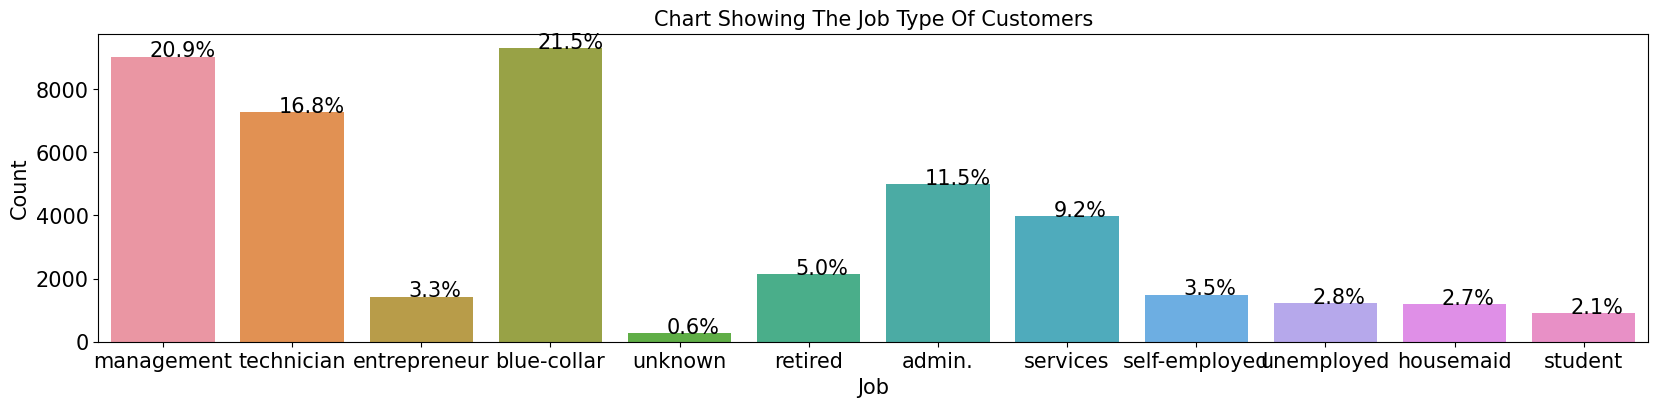

In [227]:
# analyzing the job types

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)
# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observations

- Larger percentage of the bank's customer base are blue-collar(21.5%) workers followed by management(20.9%), technicians(16.8%) and admin (11.4%) staffs.

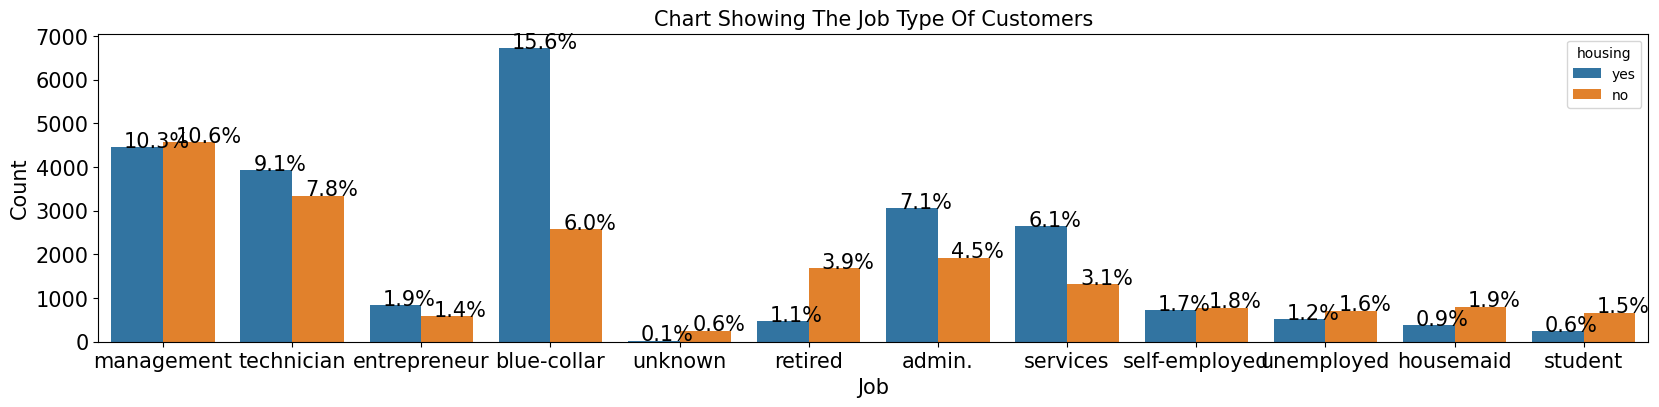

In [228]:
# analyzing the job types

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'],hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)
# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

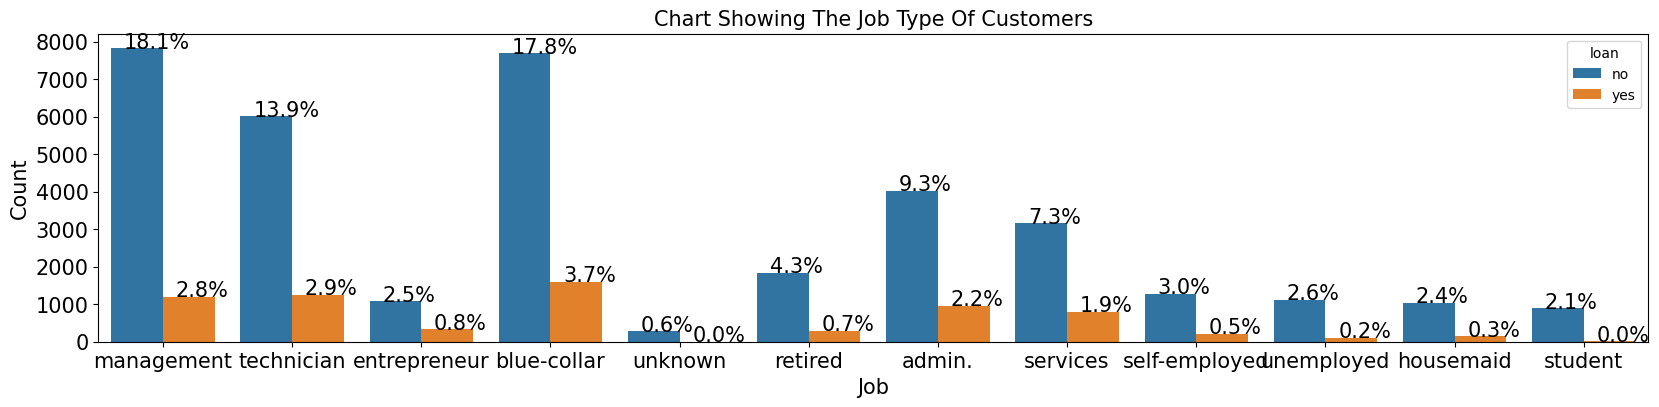

In [229]:
# analyzing the job types

plt.figure(figsize=(20,4))
ax = sns.countplot(x=df_no_outlier['job'],hue='loan', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing The Job Type Of Customers', size=15)
# Calculate percentages
total = float(len(df_no_outlier['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Analyzing Job Class That Collect More Loan

In [230]:
# getting the percentage representaton of the job and default column
cross_tab_job = pd.crosstab(index=df_no_outlier['job'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_job

default,no,yes
job,,
admin.,0.985560,0.014440
blue-collar,0.978471,0.021529
entrepreneur,0.963457,0.036543
housemaid,0.983051,0.016949
management,0.982378,0.017622
retired,0.987873,0.012127
self-employed,0.979223,0.020777
services,0.981859,0.018141
student,0.996685,0.003315


In [231]:
# getting the count representaton of the job and default column
cross_job = pd.crosstab(index=df_no_outlier['job'],
                        columns=df_no_outlier['default'])
cross_job

default,no,yes
job,,
admin.,4914,72
blue-collar,9090,200
entrepreneur,1371,52
housemaid,1160,20
management,8864,159
retired,2118,26
self-employed,1461,31
services,3897,72
student,902,3


#### Observation
- The job type classification that defaulted the most includes blue-collar, management, technician and entreprenueur with 2.1%, 1.7, 1.7 and 3.6% respectively

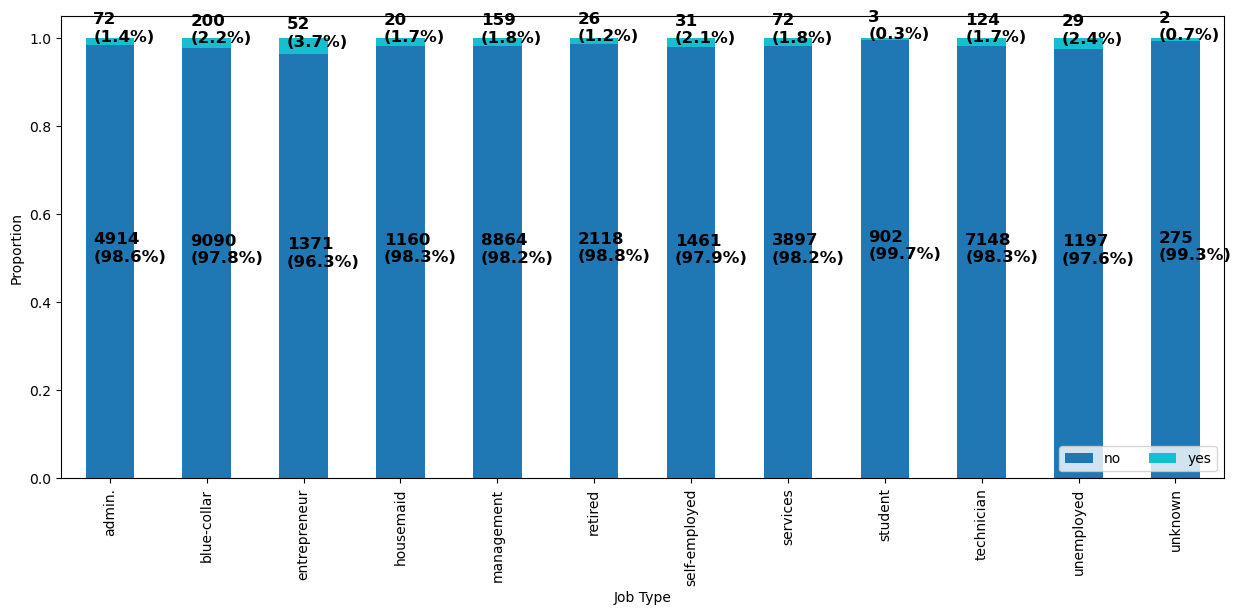

In [232]:
cross_tab_job.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_job.loc[x],
                                          cross_job.loc[x],
                                          cross_tab_job.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

#### Observations

- The entrepreneur job type recorded the highest percentage of those that defaulted (recording 3.7% of the 100% that are entrepreneurs), while students are the least that defaulted of the 100% that are students

In [233]:
df_job = df_no_outlier[['job', 'default', 'deposit']]
df_job.head(20)

,job,default,deposit
0,management,no,no
1,technician,no,no
2,entrepreneur,no,no
3,blue-collar,no,no
4,unknown,no,no
5,management,no,no
6,management,no,no
7,entrepreneur,yes,no
8,retired,no,no
9,technician,no,no


In [234]:
# Analyzing only job types that defaulted
# Removing the row with 'no' in the default column

df_job = df_job[df_job['default'] != 'no']

print(df_job.head(30))

               job default deposit
7     entrepreneur     yes      no
79        services     yes      no
338         admin.     yes      no
419     technician     yes      no
458    blue-collar     yes      no
508        retired     yes      no
562   entrepreneur     yes      no
572    blue-collar     yes      no
596       services     yes      no
636    blue-collar     yes      no
689    blue-collar     yes      no
767     technician     yes      no
805    blue-collar     yes      no
838    blue-collar     yes      no
852     management     yes      no
884     management     yes      no
932    blue-collar     yes      no
933    blue-collar     yes      no
941    blue-collar     yes      no
1116   blue-collar     yes      no
1169   blue-collar     yes      no
1197    management     yes      no
1199   blue-collar     yes      no
1223   blue-collar     yes      no
1259   blue-collar     yes      no
1325   blue-collar     yes      no
1335    management     yes      no
1364    unemployed  

In [235]:
# Confirming the removal
df_job['default'].unique()

array(['yes'], dtype=object)

In [236]:
# Reset the index
df_job = df_job.reset_index(drop=True)
df_job.head()

,job,default,deposit
0,entrepreneur,yes,no
1,services,yes,no
2,admin.,yes,no
3,technician,yes,no
4,blue-collar,yes,no


In [237]:
# checking the percentage of those that made deposit in the job types

cross_ddf_job = pd.crosstab(index=df_job['job'],
                             columns=df_job['deposit'],
                             normalize="index")
cross_ddf_job

deposit,no,yes
job,,
admin.,0.958333,0.041667
blue-collar,0.930000,0.070000
entrepreneur,0.923077,0.076923
housemaid,1.000000,0.000000
management,0.962264,0.037736
retired,0.961538,0.038462
self-employed,1.000000,0.000000
services,0.972222,0.027778
student,1.000000,0.000000


In [238]:
# getting the count representaton of the deposit

cross_job_df = pd.crosstab(index=df_job['job'],
                        columns=df_job['deposit'])
cross_job_df

deposit,no,yes
job,,
admin.,69,3
blue-collar,186,14
entrepreneur,48,4
housemaid,20,0
management,153,6
retired,25,1
self-employed,31,0
services,70,2
student,3,0


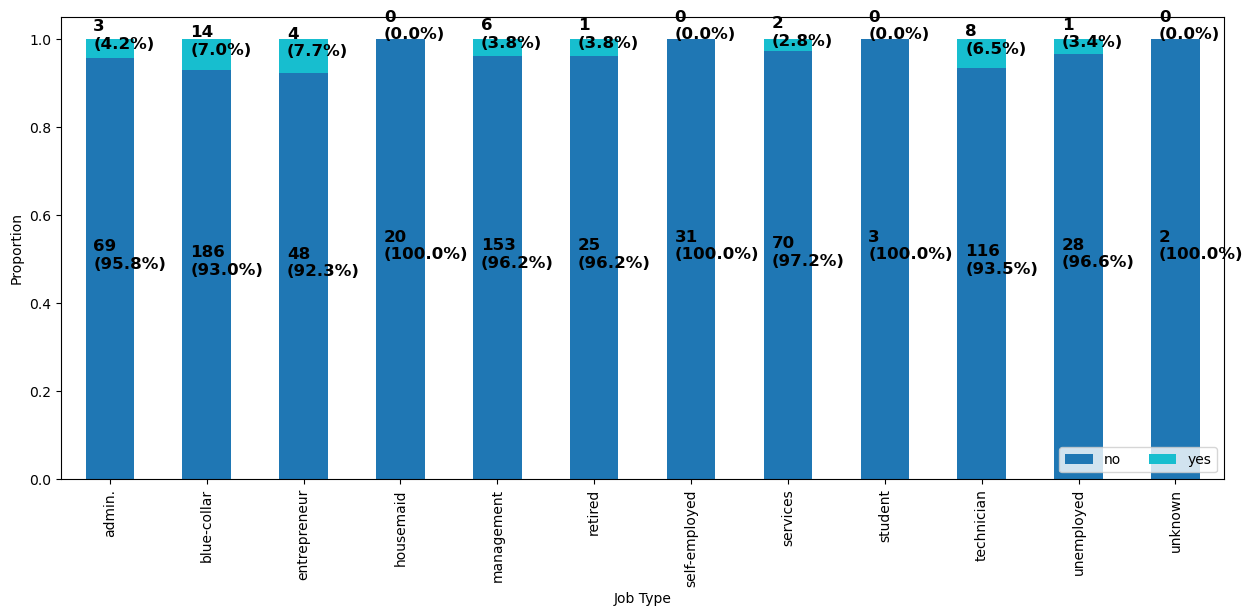

In [239]:
cross_ddf_job.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross_ddf_job.loc[x],
                                          cross_job_df.loc[x],
                                          cross_ddf_job.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Observations

- The above chart is a representation of customers under different job types that are defaulters only
- The chart revealed that 100% of customers with unkown job type, self employed, housemaid and students did not make any deposit and were given loans
- More than 90% of customers given loans to did not make deposit to the bank.

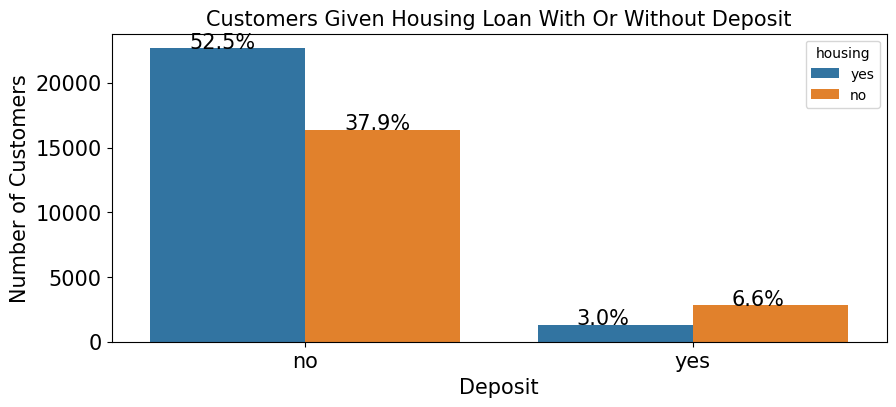

In [240]:
# analyzing the type of customers given housing loan

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers Given Housing Loan With Or Without Deposit', size=15)
# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation
- 52.5% of customers that did not make deposit were given loans to.
- 3% of customers that made deposit were given loan.

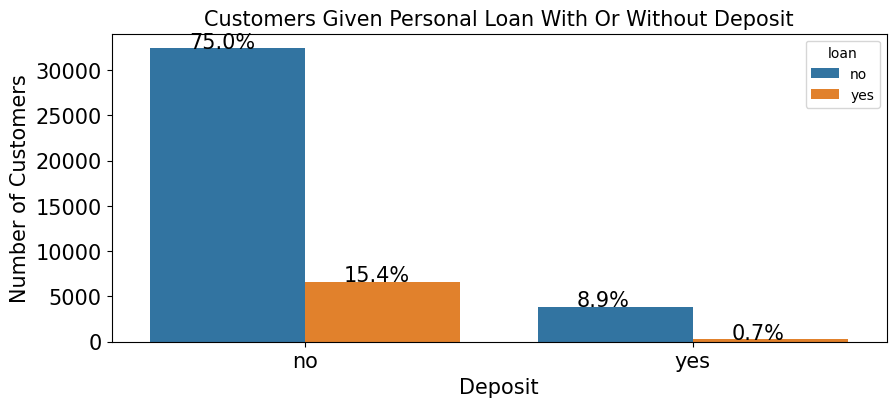

In [241]:
# analyzing the type of customers given personal loan

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='loan', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers Given Personal Loan With Or Without Deposit', size=15)
# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Obsevations
- 15.4% of the customers were given loan without deposit, which is higher than those that made deposit, represented by 0.7% of the customers.

### Analyzing customers that defaulted there housing loans

In [242]:
# getting the percentage representaton of the housing and default column
cross_tab_housing = pd.crosstab(index=df_no_outlier['housing'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_housing

default,no,yes
housing,,
no,0.980842,0.019158
yes,0.982401,0.017599


In [243]:
# getting the count representaton of the deposit and default column
cross_tab_h = pd.crosstab(index=df_no_outlier['housing'],
                        columns=df_no_outlier['default'])
cross_tab_h

default,no,yes
housing,,
no,18841,368
yes,23556,422


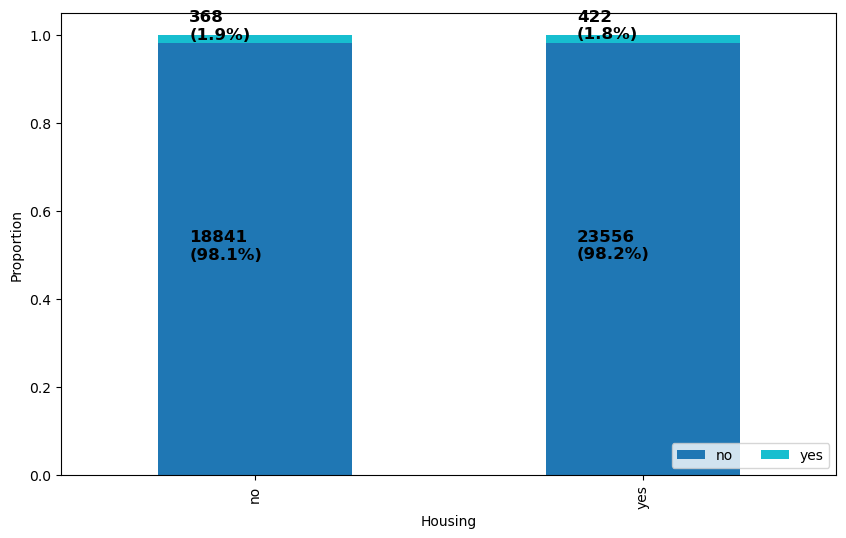

In [244]:
cross_tab_housing.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Housing")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_h.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_housing.loc[x],
                                          cross_tab_h.loc[x],
                                          cross_tab_housing.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

#### Observation

- The chart revealed that 1.8% of customers that collected housing loan defaulted.

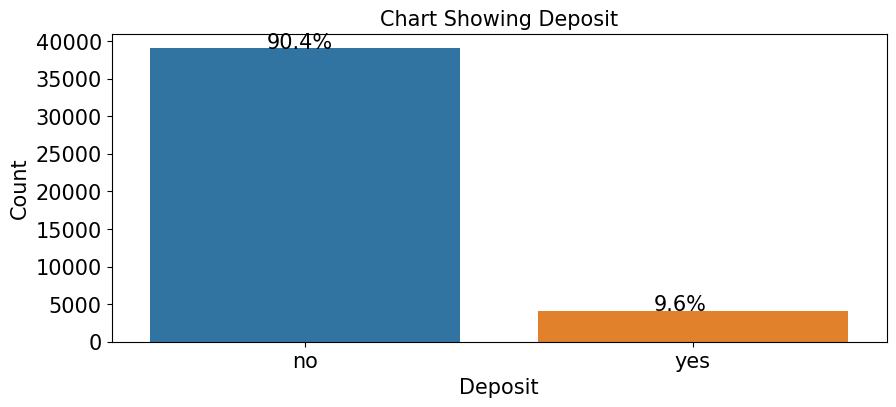

In [245]:
#analizing deposit
plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Chart Showing Deposit', size=15)
# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation
- 9.6% of customers only make deposit to the bank

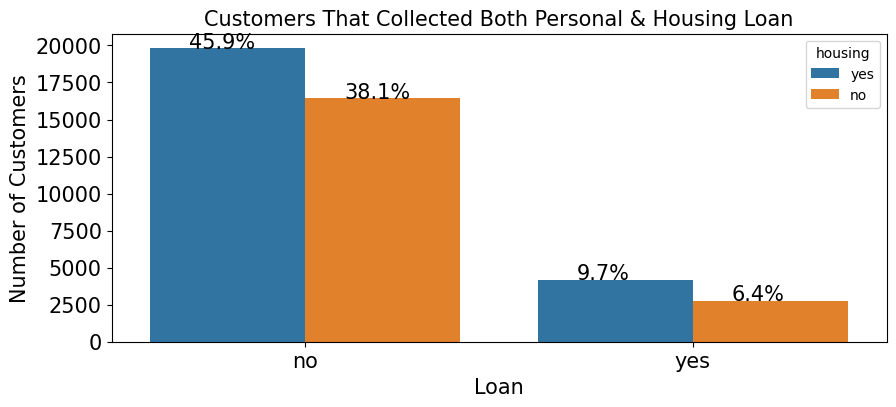

In [246]:
# analyzing the customers given both personal and housing loans

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['loan'], hue='housing', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Loan', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Customers That Collected Both Personal & Housing Loan', size=15)
# Calculate percentages
total = float(len(df_no_outlier['loan']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation
- 9.7% of customers were given both housing and personal loans.
- 45.9% were given only housing loans.
- 6.4% were given only personal loan.
- 38.1% did not get any type of loan.

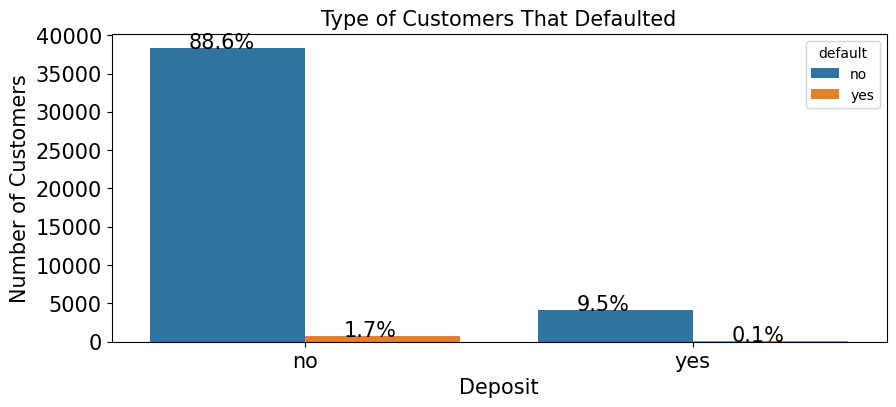

In [247]:
# analyzing customers that defaulted there loans

plt.figure(figsize=(10,4))
ax = sns.countplot(x=df_no_outlier['deposit'], hue='default', data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Deposit', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Type of Customers That Defaulted', size=15)
# Calculate percentages
total = float(len(df_no_outlier['deposit']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation

- 1.7% of customers that did not make deposit were given loan.

In [248]:
# getting the percentage representaton of the deposit and default column
cross_tab_prop = pd.crosstab(index=df_no_outlier['deposit'],
                             columns=df_no_outlier['default'],
                             normalize="index")
cross_tab_prop

default,no,yes
deposit,,
no,0.980761,0.019239
yes,0.990607,0.009393


In [249]:
# getting the count representaton of the deposit and default column
cross_tab = pd.crosstab(index=df_no_outlier['deposit'],
                        columns=df_no_outlier['default'])
cross_tab

default,no,yes
deposit,,
no,38284,751
yes,4113,39


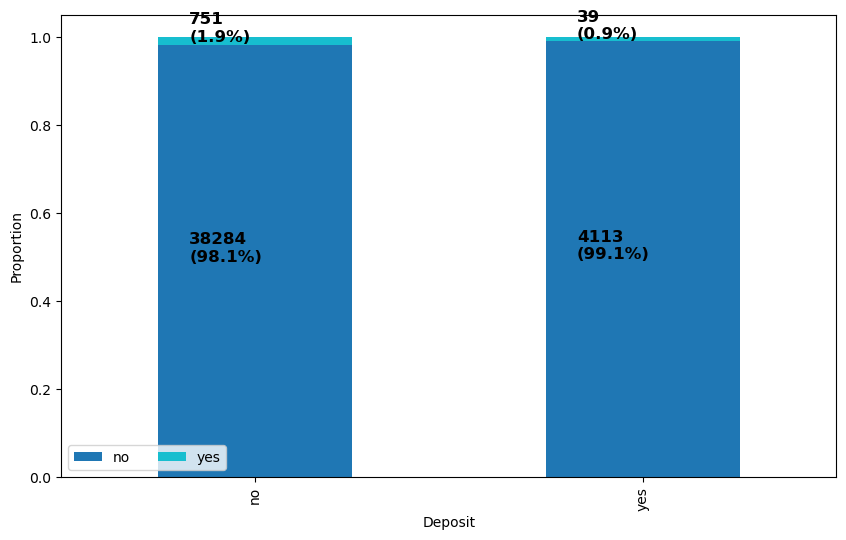

In [250]:
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Deposit")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

#### Observation

- Clearly in the stack column above, it revealed that 1.9% of the of the entire population that did not make deposit defaulted while 0.9% of the entire population that makes deposit defaulted.
- It shows that there is a higher probabbility of those that did not make deposit to default.

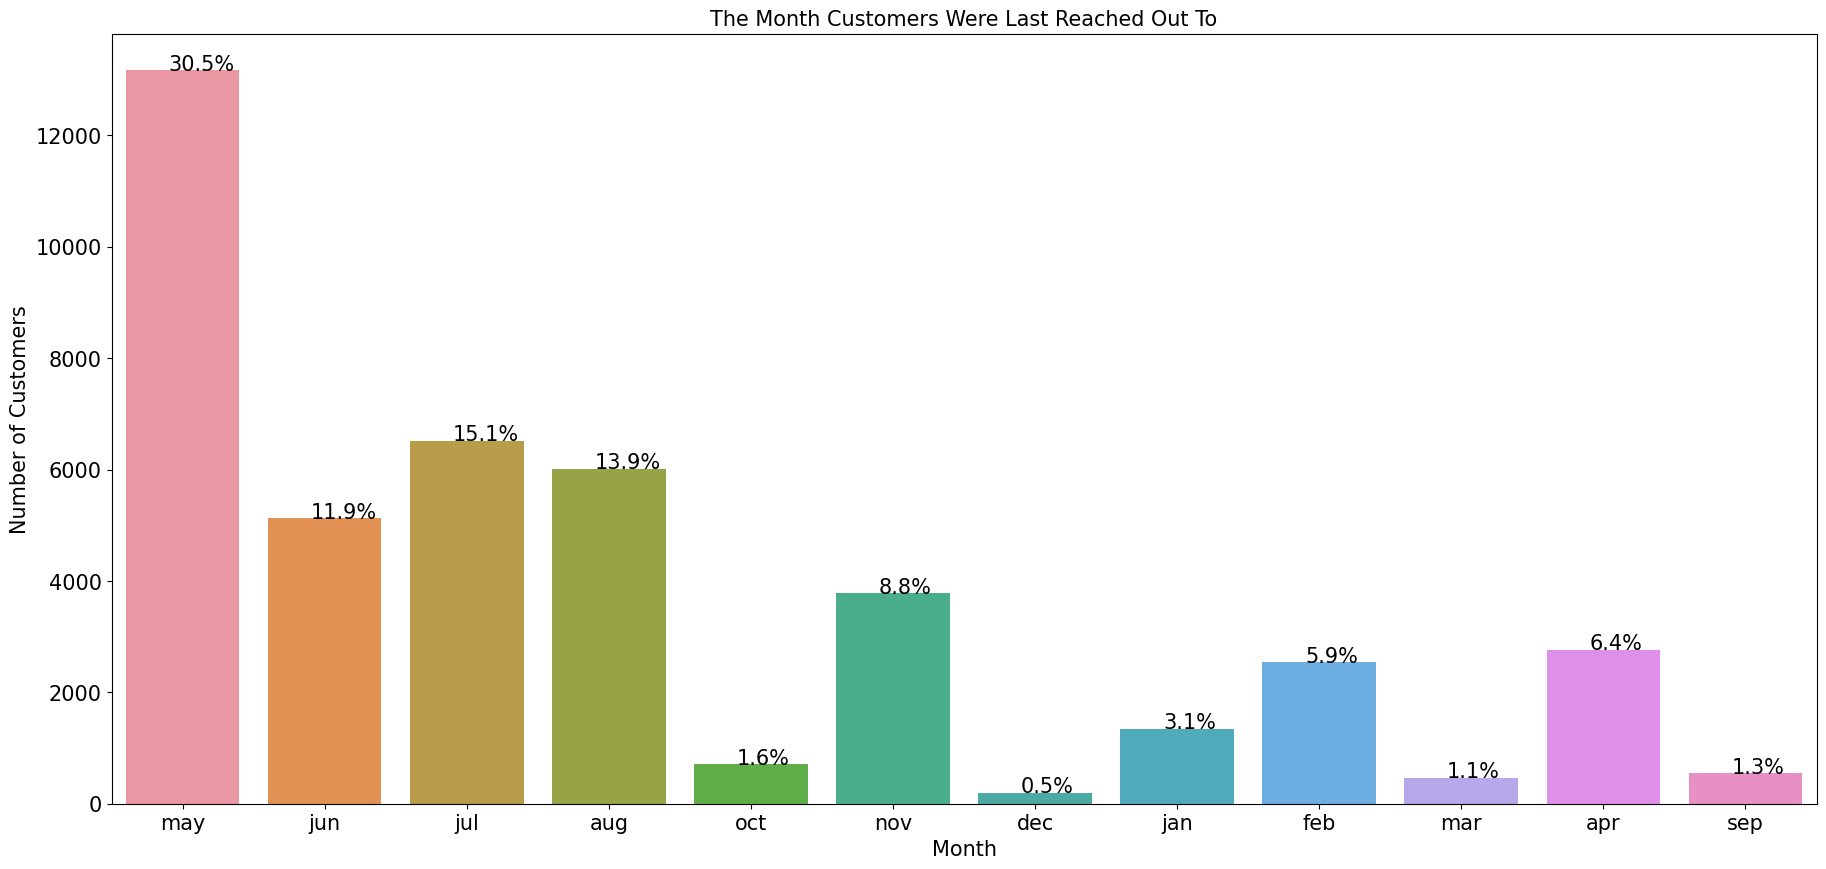

In [251]:
# analyzing the number of customers reached out to in each month
plt.figure(figsize=(22,10))
ax = sns.countplot(x=df_no_outlier['month'], data=df_no_outlier)
plt.xticks(size=15)
plt.xlabel('Month', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('The Month Customers Were Last Reached Out To', size=15)
# Calculate percentages
total = float(len(df_no_outlier['loan']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()

#### Observation
- More customers were reached out to in the month of May.

Text(0.5, 1.0, 'Duration By Deposit')

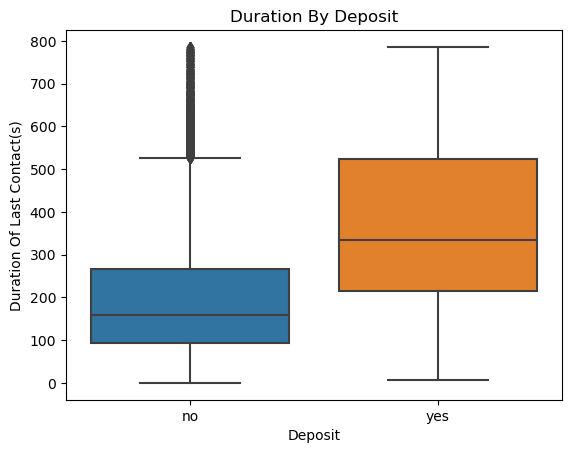

In [252]:
sns.boxplot(x='deposit', y='duration', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Duration Of Last Contact(s)')
plt.title('Duration By Deposit')

#### Observation
- There is a little overlap in the boxplot representing those that made deposit and those that did not.
- Within the contact duration of 320s to 520s, customers that made deposit are widely dispersed from the median compared to those below the median.
- The chart also reveals that there is a high probability of customers to make deposit when contacted for 290s to 520s.

Text(0.5, 1.0, 'Previous Contacts Made By Deposit')

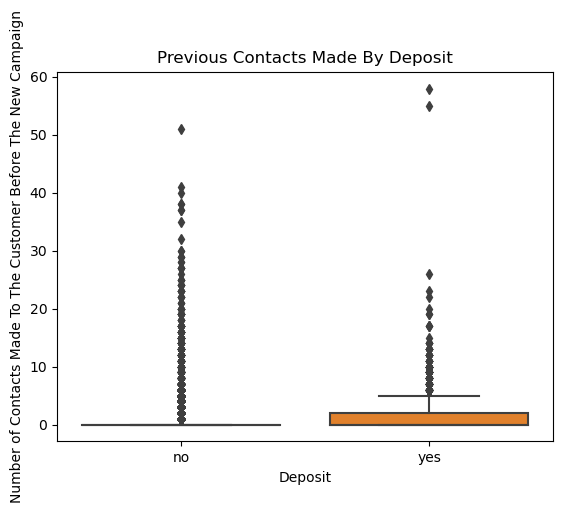

In [253]:
sns.boxplot(x='deposit', y='previous', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Number of Contacts Made To The Customer Before The New Campaign')
plt.title('Previous Contacts Made By Deposit')

#### Observation
- This chart shows that beyond the mean which is 'zero' (the two instances having thesame mean of 0), the 'Yes' intance have customers dispersed from the mean above the median value.
- There are customers that are compacted on the same mean value in both instances

Text(0.5, 1.0, 'Campaign Contacts Made By Deposit')

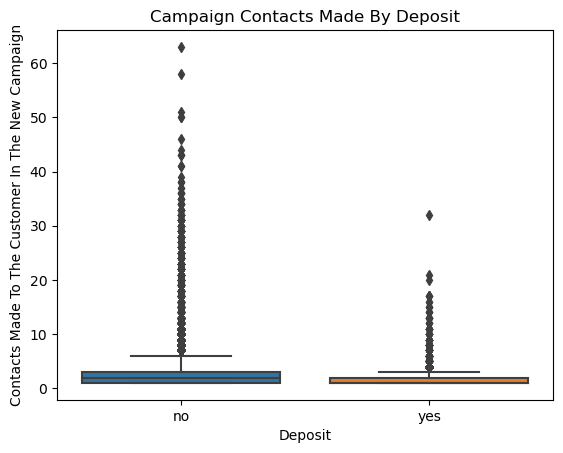

In [254]:
sns.boxplot(x='deposit', y='campaign', data=df_no_outlier)
plt.xlabel('Deposit')
plt.ylabel('Contacts Made To The Customer In The New Campaign')
plt.title('Campaign Contacts Made By Deposit')

#### Analysing the deposit column against previous and campaign columns

In [255]:
# creating a new data frame
df_group_1=df_no_outlier[['deposit', 'campaign', 'previous']]
df_group_1

,deposit,campaign,previous
0,no,1,0
1,no,1,0
2,no,1,0
3,no,1,0
4,no,1,0
...,...,...,...
45204,yes,1,8
45205,yes,2,0
45207,yes,2,0
45209,no,4,0


In [256]:
df_group_1.describe()

,campaign,previous
count,43187.000000,43187.000000
mean,2.768333,0.576238
std,3.117429,1.911847
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,63.000000,58.000000


In [257]:
# grouping the colums by the deposit column
df_group_1 = df_group_1.groupby(['deposit'],as_index=False).mean()
df_group_1

,deposit,campaign,previous
0,no,2.849135,0.495760
1,yes,2.008671,1.332852


#### Observation

- The table above clearly give the interaction between deposit, campaign and previous campaing made
- It reveals that the average number of contact that was made in the previous campaign to make customers make deposit is 1.3
- And it reveals that in the new campaign, customers have to be reached out to on the average of 2

In [258]:
# analysing the depposit against poutcome, campaign and previous features
df_group_one=df_no_outlier[['deposit','poutcome', 'campaign', 'previous']]
df_group_one

,deposit,poutcome,campaign,previous
0,no,unknown,1,0
1,no,unknown,1,0
2,no,unknown,1,0
3,no,unknown,1,0
4,no,unknown,1,0
...,...,...,...,...
45204,yes,failure,1,8
45205,yes,unknown,2,0
45207,yes,unknown,2,0
45209,no,unknown,4,0


In [259]:
df_group_one.describe()

,campaign,previous
count,43187.000000,43187.000000
mean,2.768333,0.576238
std,3.117429,1.911847
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,63.000000,58.000000


In [260]:
# analyzing for multiple categories

df_group_test = df_no_outlier[['deposit','poutcome', 'campaign', 'previous']]
grouped_test = df_group_test.groupby(['poutcome', 'deposit'],as_index=False).mean()
grouped_test

,poutcome,deposit,campaign,previous
0,failure,no,2.011423,2.858877
1,failure,yes,1.697543,3.102079
2,other,no,2.553918,3.862693
3,other,yes,2.037594,4.135338
4,success,no,1.980695,3.007722
5,success,yes,1.701639,3.050273
6,unknown,no,2.983517,0.000427
7,unknown,yes,2.187961,0.000819


In [261]:
# converting it to pivot for readability

grouped_pivot = grouped_test.pivot(index='poutcome', columns='deposit')
grouped_pivot

campaign            previous          
deposit         no       yes        no       yes
poutcome                                        
failure   2.011423  1.697543  2.858877  3.102079
other     2.553918  2.037594  3.862693  4.135338
success   1.980695  1.701639  3.007722  3.050273
unknown   2.983517  2.187961  0.000427  0.000819

#### Observations
- The average value for a successful promotion is seen to be lesser in the campaign feature with '1.7 contacts'

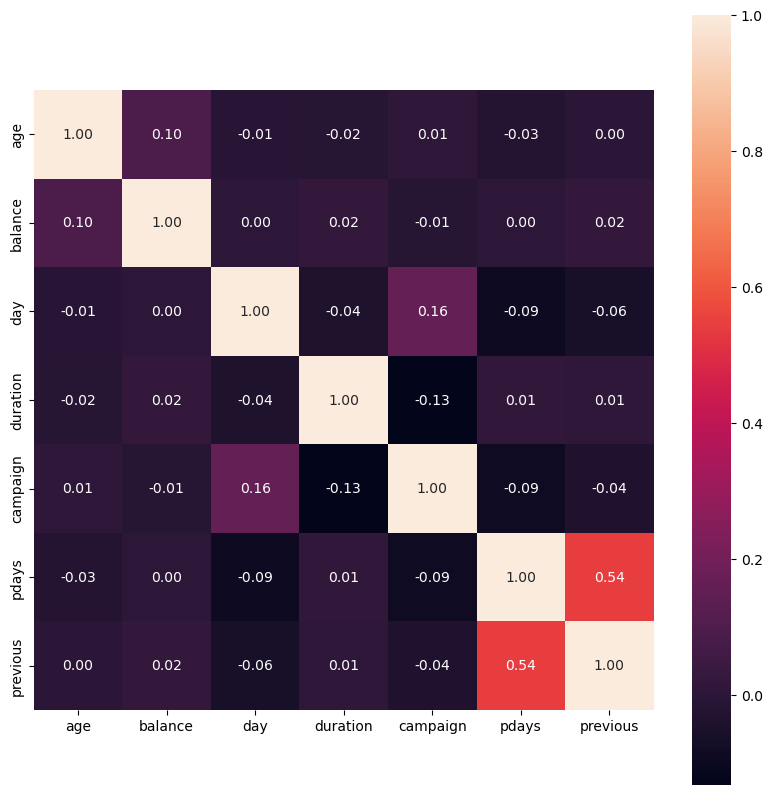

In [262]:
# the correlation matrix
plt.figure(figsize = (10,10))
hm = sns.heatmap (df_no_outlier.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

<AxesSubplot:xlabel='previous', ylabel='pdays'>

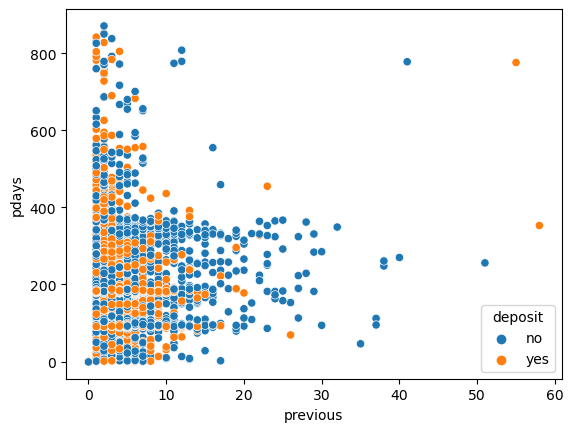

In [263]:
sns.scatterplot(x='previous', y='pdays', data=df_no_outlier, hue='deposit')

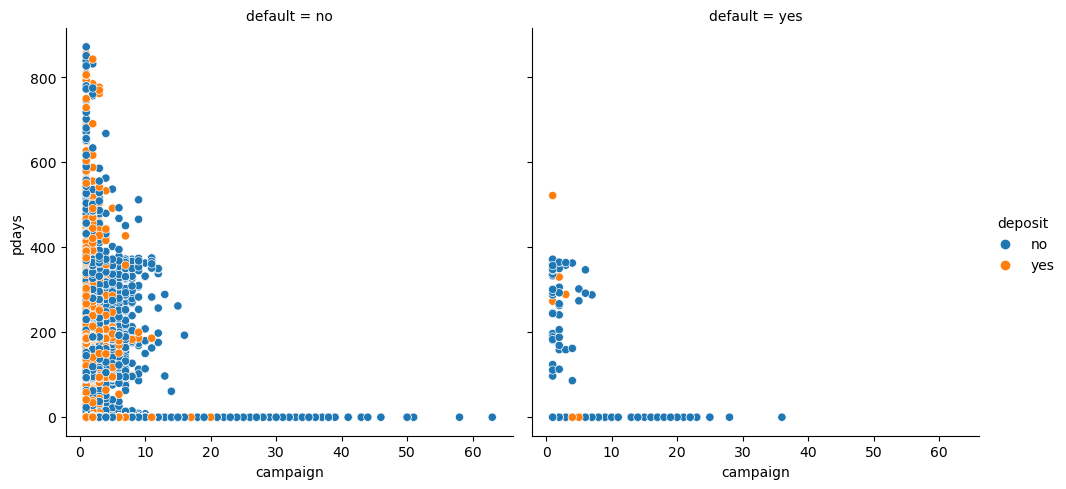

In [264]:
sns.relplot(
    data=df_no_outlier,
    x="campaign", y="pdays", hue="deposit", col="default",
)

<AxesSubplot:xlabel='education', ylabel='count'>

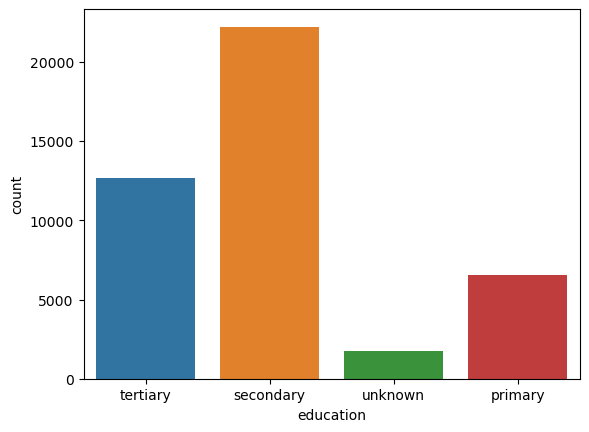

In [265]:
sns.countplot(x='education', data=df_no_outlier)

<AxesSubplot:xlabel='education', ylabel='count'>

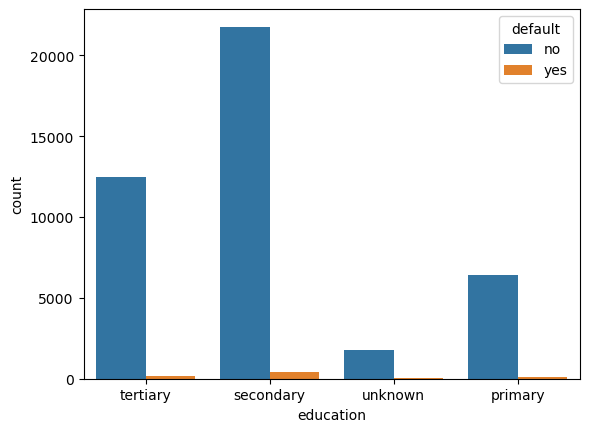

In [266]:
sns.countplot(x='education',hue='default', data=df_no_outlier)

### Feature Engineering

In [267]:
# encoding the education column
le = LabelEncoder()

df_no_outlier['education'] = le.fit_transform(df_no_outlier['education'])

In [268]:
df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Old Adults (<=70)
1,44,technician,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adults (<=45)
2,33,entrepreneur,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adults (<=45)
3,47,blue-collar,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Old Adults (<=70)
4,33,unknown,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adults (<=45)


In [269]:
# encoding the categorical features
le = LabelEncoder()

df_no_outlier['job'] = le.fit_transform(df_no_outlier['job'])


df_no_outlier['marital'] = le.fit_transform(df_no_outlier['marital'])


df_no_outlier['poutcome'] = le.fit_transform(df_no_outlier['poutcome'])

df_no_outlier['month'] = le.fit_transform(df_no_outlier['month'])

df_no_outlier['contact'] = le.fit_transform(df_no_outlier['contact'])

df_no_outlier['default'] = le.fit_transform(df_no_outlier['default'])

df_no_outlier['housing'] = le.fit_transform(df_no_outlier['housing'])

df_no_outlier['loan'] = le.fit_transform(df_no_outlier['loan'])

df_no_outlier['deposit'] = le.fit_transform(df_no_outlier['deposit'])

df_no_outlier['age_bracket'] = le.fit_transform(df_no_outlier['age_bracket'])

df_no_outlier.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,2
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,2
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0


In [270]:
df_no_outlier.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bracket'],
      dtype='object')

### Machine Learning

In [271]:
df1 = df_no_outlier[['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome','balance','duration']]

label = df_no_outlier['deposit']

In [272]:
df1

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,2143,261
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,29,151
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,2,76
3,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,1506,92
4,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,1,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,0,0,0,17,9,1,40,8,0,2850,300
45205,25,9,2,1,0,0,1,0,17,9,2,-1,0,3,505,386
45207,71,5,0,0,0,0,0,0,17,9,2,-1,0,3,1729,456
45209,57,1,1,1,0,0,0,1,17,9,4,-1,0,3,668,508


In [273]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43187 non-null  int64
 1   job        43187 non-null  int32
 2   marital    43187 non-null  int32
 3   education  43187 non-null  int32
 4   default    43187 non-null  int32
 5   housing    43187 non-null  int32
 6   loan       43187 non-null  int32
 7   contact    43187 non-null  int32
 8   day        43187 non-null  int64
 9   month      43187 non-null  int32
 10  campaign   43187 non-null  int64
 11  pdays      43187 non-null  int64
 12  previous   43187 non-null  int64
 13  poutcome   43187 non-null  int32
 14  balance    43187 non-null  int64
 15  duration   43187 non-null  int64
dtypes: int32(9), int64(7)
memory usage: 5.1 MB


In [274]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [275]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
37791,33,1,1,1,0,1,0,0,14,8,2,370,8,1,245,437
21641,39,4,2,2,1,1,0,0,19,1,4,-1,0,3,-401,274
18256,56,4,1,2,0,0,0,0,31,5,12,-1,0,3,25290,81
31088,27,6,2,2,0,0,0,0,16,3,1,-1,0,3,516,57
34574,30,7,1,1,0,1,0,0,5,8,2,-1,0,3,253,235


In [276]:
y_train.head()

37791    0
21641    0
18256    0
31088    0
34574    0
Name: deposit, dtype: int32

In [277]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,balance,duration
23201,59,5,1,0,0,1,0,0,27,1,4,-1,0,3,-47,84
26156,51,4,0,2,0,1,0,0,20,9,3,-1,0,3,2011,118
29527,52,7,1,0,0,1,1,0,3,3,1,-1,0,3,3016,142
19000,46,4,1,2,0,0,0,0,5,1,2,-1,0,3,1720,250
6344,60,9,0,2,0,1,0,2,27,8,1,-1,0,3,-317,498


In [278]:
y_test.head()

23201    0
26156    0
29527    0
19000    0
6344     0
Name: deposit, dtype: int32

In [279]:
# Model building

# Logistic Regression

logreg = LogisticRegression() #logreg is a variable name assigned to LogisticRegression(), it can be anything

logreg.fit(X_train, y_train)  # this is basically machine learning

ly_pred = logreg.predict(X_test) # machine testing
#
print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

# Calculate R-squared score
r2 = r2_score(y_test, ly_pred)
print('R_squared score: ', r2)

Score of train: 0.8986367188630641
Score of test: 0.9063440611252604
Logistic Regression
Accuracy: 0.9063440611252604
Precision: 0.4226190476190476
Recall: 0.09067688378033206
F1-score: 0.14931650893796006
AUC-ROC: 0.5391640306871106
R_squared score:  -0.13619734442842923


#### Observation
-Having relatively the same percentage for the test score and train score reveals that there is no overfitting in the features used in the machine leaning model.

<function matplotlib.pyplot.show(close=None, block=None)>

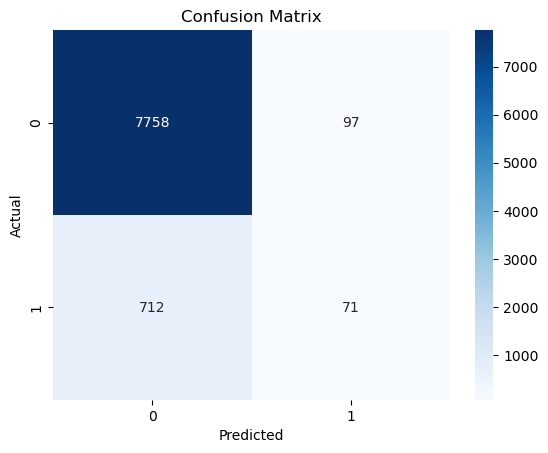

In [280]:
# Confusion Matrix For Logistic Regression

lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

*** The confusion matrix of the logistic regression predicted correctly 7758 that did not make deposits and 71 customers that made deposit, predicted, but it wrongly predicted that 97 persons made deposit and 712 customers made deposit.

In [296]:
# Initialize the classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test)

print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('R_squared score: ', r2)

Score of train: 0.8986367188630641
Score of test: 0.9063440611252604
Logistic Regression
Accuracy: 0.9260245427182218
Precision: 0.6374045801526718
Recall: 0.42656449553001274
F1-score: 0.5110941086457537
AUC-ROC: 0.7011880402538669
R_squared score:  0.10255858703366338


<function matplotlib.pyplot.show(close=None, block=None)>

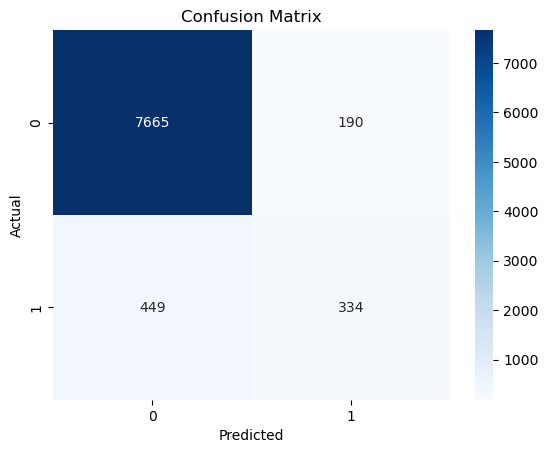

In [297]:
# Confusion Matrix For XGB Classifier

lcm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [281]:
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Score of train:', rfc.score(X_train, y_train))
print('Score of test:', rfc.score(X_test, y_test))
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Precision:', precision_score(y_test, rfc_pred))
print('Recall:', recall_score(y_test, rfc_pred))
print('F1-score:', f1_score(y_test, rfc_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, rfc_pred)
print('R_squared score: ', r2)

Score of train: 0.9999131668065646
Score of test: 0.9237091919425793
Random Forest Classifier
Accuracy: 0.9237091919425793
Precision: 0.655
Recall: 0.334610472541507
F1-score: 0.4429416737109045
AUC-ROC: 0.6585210223942416
R_squared score:  0.074469653920476


<function matplotlib.pyplot.show(close=None, block=None)>

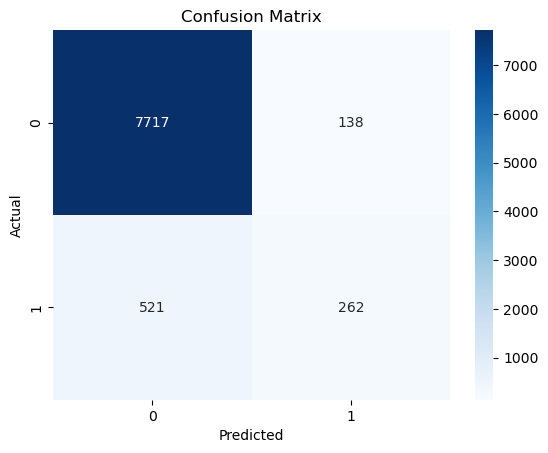

In [282]:
# Confusion Matrix For Logistic Regression

rcm = confusion_matrix(y_test, rfc_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [283]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print('Score of train:', dtc.score(X_train, y_train))
print('Score of test:', dtc.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, dtc_pred))
print('Precision:', precision_score(y_test, dtc_pred))
print('Recall:', recall_score(y_test, dtc_pred))
print('F1-score:', f1_score(y_test, dtc_pred))
print('AUC-ROC:', roc_auc_score(y_test, dtc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, dtc_pred)
print('R_squared score: ', r2)

Score of train: 1.0
Score of test: 0.8922204213938412
Decision Tree Classifier
Accuracy: 0.8922204213938412
Precision: 0.41435185185185186
Recall: 0.45721583652618136
F1-score: 0.4347298117789921
AUC-ROC: 0.6963991340492142
R_squared score:  -0.3075398364188724


<function matplotlib.pyplot.show(close=None, block=None)>

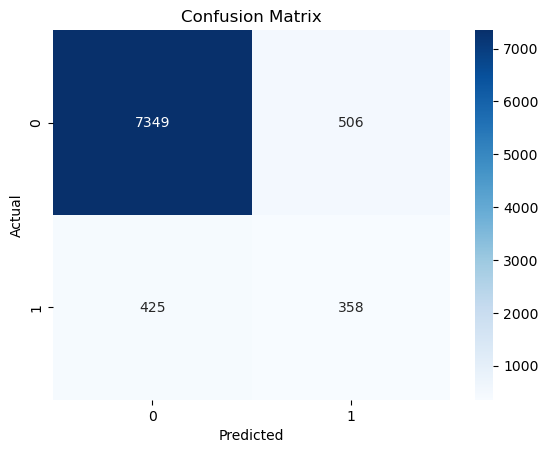

In [284]:
# Confusion Matrix For Logistic Regression

dcm = confusion_matrix(y_test, dtc_pred)

# visualize the confusion matrix
sns.heatmap(dcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [285]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = dtc.predict(X_test)

print('Score of train:', gb.score(X_train, y_train))
print('Score of test:', gb.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1-score:', f1_score(y_test, gb_pred))
print('AUC-ROC:', roc_auc_score(y_test, gb_pred))
# Calculate R-squared score
r2 = r2_score(y_test, gb_pred)
print('R_squared score: ', r2)

Score of train: 0.9225737358534256
Score of test: 0.9230145867098866
Decision Tree Classifier
Accuracy: 0.8922204213938412
Precision: 0.41435185185185186
Recall: 0.45721583652618136
F1-score: 0.4347298117789921
AUC-ROC: 0.6963991340492142
R_squared score:  -0.3075398364188724


<function matplotlib.pyplot.show(close=None, block=None)>

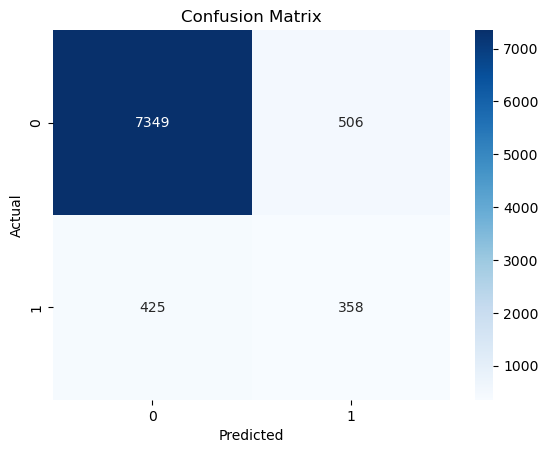

In [286]:
# Confusion Matrix For Logistic Regression

gcm = confusion_matrix(y_test, gb_pred)

# visualize the confusion matrix
sns.heatmap(gcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

### Normalization

In [287]:
# minmaxscaler ensures all the variables falls between 0 and 1
# it is used to check and normalize outliers

scaler = MinMaxScaler()

df1['Scaled_bal'] = scaler.fit_transform(df1['balance'].values.reshape(-1,1))
df1['Scaled_dur'] = scaler.fit_transform(df1['duration'].values.reshape(-1,1))


df1.drop(['balance', 'duration'], axis=1, inplace=True) # this helps to remove the colums of the highlighted feature.

df1.head()

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Scaled_bal,Scaled_dur
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0.092259,0.332061
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0.073067,0.192112
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0.072822,0.096692
3,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,0.086476,0.117048
4,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,0.072812,0.251908


In [288]:
#  applying 8 different machine learning models to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision tree'],
              [LogisticRegression(), 'Logistic Regression']]

In [289]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name=classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [290]:
acc_list

{'XGB Classifier': ['92.6%'],
 'Random Forest': ['92.23%'],
 'K-Nearest Neighbors': ['90.1%'],
 'SGD Classifier': ['84.58%'],
 'SVC': ['90.94%'],
 'Naive Bayes': ['84.59%'],
 'Decision tree': ['89.34%'],
 'Logistic Regression': ['90.63%']}

In [291]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,92.6%,92.23%,90.1%,84.58%,90.94%,84.59%,89.34%,90.63%


In [292]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,63.74%,63.86%,39.47%,25.25%,0.0%,28.76%,42.05%,42.26%


In [293]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,42.66%,32.95%,17.24%,35.76%,0.0%,47.38%,46.62%,9.07%


In [295]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,70.12%,65.55%,57.3%,62.6%,50.0%,67.84%,70.11%,53.92%


#### Insights

- It is observed that the previous campaign appears to be more sucessful as most of the customers made deposit to the bank and on the average, it only takes 1.3 contact to convince a customer to make deposit unlike the new campaign that on the average, a contact of 2.0 must be made to make deposit by a customer.

- It is also observed that the bank awards housing loans to 52.5% of customers and 15.4% of personal loans to customers that do not make deposit to the bank over a period of time.

- Over 90% of customers across all the job types that are defaulters, are customers that did not make deposit to the bank. 

- The chart also reveals that there is a high probability of customers to make deposit when contacted for 290s to 520s.

- The analysis revealed that only 9.6% of the entire customers made deposit.

- Customers reached out to through cellular and telephone in the previous campaign have a higher probability of customers to make deposits.


#### Recommendations

- The bank should cut or stop the loans given to customers that do not make deposit to the bank.

- The bank executives should endeavour to utilize the proceedure used in the previous campaign to enable them retain more customers that will make deposits.

- The bank should endeavour to reach out to there customers more via cellular and telephone.

#### Additional Data Needed

 For a more comprehensive analysis, the following information would also be needed;

- The last day deposit was made by the customer.
- Requirements for approving loan.
- The type of account operated by the customer.
- Collateral for loan approval.
- Number of times each customer have been granted loan and defaulted.